### Julien Toucheboeuf & Hugues René-Bazin

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
from time import time
from tqdm import tqdm 
from scipy.stats import gamma
import math

### Box-Muller VS Marsaglia

In [7]:
def Box_Muller():
    u, v = rd.uniform(), rd.uniform()
    return (np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v), np.sqrt(-2*np.log(u))*np.sin(2*np.pi*v))

def Marsaglia():
    length = np.sqrt(np.random.uniform(0, 1))
    angle = np.pi * np.random.uniform(0, 2)
    v1 = length * np.cos(angle)
    v2 = length * np.sin(angle)
    
    return v1*np.sqrt(-2*np.log(length**2)/length**2),v2*np.sqrt(-2*np.log(length**2)/length**2)


In [8]:
## Box Muller 
iterations = 10000
begin = time()
for i in tqdm(range(iterations)):
    Box_Muller()
    
duration = time() - begin 
print(duration, 's for : ', iterations, 'iterations') 

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 29390.42it/s]

0.34024691581726074 s for :  10000 iterations


In [9]:
begin = time()
for i in tqdm(range(iterations)):
    Marsaglia()
    
duration2 = time() - begin 
print(duration2, 's for : ', iterations, 'iterations') 

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 19699.34it/s]

0.5163357257843018 s for :  10000 iterations


Wall time: 0 ns


### Simulation loi Gamma Acceptance-Rejection method

In [45]:
# alpha 0 < alpha < 1 : 

def v_simulation(alpha,u):
    c = np.e/(alpha + np.e)
    
    if 0 < u < c : 
        return (u/c)**(1/alpha)
    if u >= c: 
        return -np.log((1-u)/(c*alpha))
    else:
        return " please enter a number > 0"

def f(x, alpha):
    
    return gamma.pdf(alpha,x)

def g(alpha, x):
    
    c = (alpha * np.e)/(alpha + np.e)
    if x >= 1:
        return c*np.exp(-x)
    if 0 < x <=1:
        return c*x**(alpha -1)
    else:
        return " please enter a number > 0"
    
def accept_reject(f,g,alpha,n):
    c = (alpha * np.e)/(alpha + np.e)
    simulation = []
    
    while len(simulation) < n:
        u = np.random.uniform()
        v = v_simulation(alpha,np.random.uniform())
        #print(c, g(alpha,v))
        if u < f(v,alpha)/(c*g(alpha,v)):
            simulation.append(v)
            
    return simulation

In [46]:
simulation = accept_reject(f,g,0.5,100)

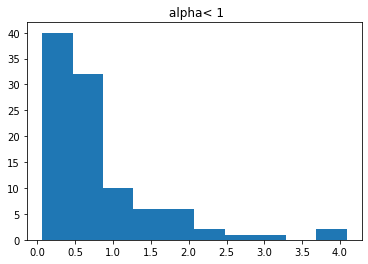

In [60]:
plt.title(" alpha< 1")
plt.hist(simulation)
plt.show()

In [56]:
# si alpha >=1 (et n'est pas dans N ): 

alpha = 3.4

def accept_reject2(f,g,alpha,n):
    a,b = int(alpha), float(alpha) - int(alpha)
    
    s_decimale = accept_reject(f,g,b,n)
    
    s_part_entiere = [ -np.log(math.prod([np.random.uniform() for i in range(a)])) for i in range(n)]
    
    result = []
    
    for i in range(len(s_decimale)):
        result.append(s_decimale[i]+s_partie_entiere[i])
        
    return result
    

In [57]:
simulation2 = accept_reject(f,g,3.5,100)

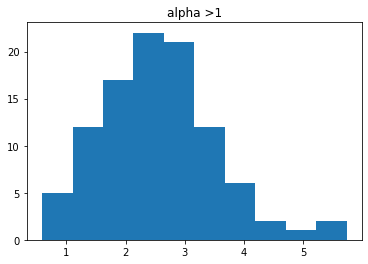

In [62]:
plt.title("alpha >1")
plt.hist(simulation2)
plt.show()